# Evaluation_Project-2:Avacado Project

Avocado is a fruit consumed by people heavily in the United States. 
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
Label :

The dataset can be seen in two angles to find the region and find the average price .

# Imorting all the necessary libraries:

In [3]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the Data Set:

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [31]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [3]:
# Removing the unwanted and unrelated columns:

df=df.drop(columns='Unnamed: 0',axis=1)
df.shape # checking the dataset dimension

(18249, 13)

# Description:
    Here there are 18249 rows and 13 columns .In this region is considered as label for region prediction classification
    model and average price of avacado is predicted using regression model.
Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

total bags-Total number of avocado bags sold

Small Bags-Total number of  small avocado bags sold

Large Bags	-Total number of large avocado bags sold

XLarge Bags-Total number ofextra large avocado bags sold

In [25]:
df.info()# Getting the information of non null count and dtype of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


# Classification Model:
Here, the target variable is region

In [6]:
df['region'].value_counts() #To check the count of values in target variable('quality')

West                   338
HarrisburgScranton     338
DallasFtWorth          338
GreatLakes             338
Charlotte              338
NewYork                338
NewOrleansMobile       338
Seattle                338
SouthCentral           338
Denver                 338
PhoenixTucson          338
LosAngeles             338
Midsouth               338
BuffaloRochester       338
TotalUS                338
Atlanta                338
Boise                  338
CincinnatiDayton       338
Pittsburgh             338
Roanoke                338
Syracuse               338
SanDiego               338
Detroit                338
Portland               338
Indianapolis           338
Spokane                338
SanFrancisco           338
Jacksonville           338
NorthernNewEngland     338
BaltimoreWashington    338
MiamiFtLauderdale      338
StLouis                338
RichmondNorfolk        338
Orlando                338
Southeast              338
Chicago                338
RaleighGreensboro      338
C

In [7]:
df.isnull().sum() #checking the null value count of all the coulumns

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# DESCRIBING THE DATASET:

In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# replacing all the type COLUMN NAMES into values:

In [4]:
df['type']=df['type'].replace({'conventional':1,'organic':0})

# LABEL ENCODER:

In [5]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Date']=LE.fit_transform(df['Date'])
df['Date'].value_counts()

0      108
122    108
153    108
10     108
26     108
      ... 
101    108
159    108
128    107
129    107
48     107
Name: Date, Length: 169, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['region']=LE.fit_transform(df['region'])
df['region'].value_counts()

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
6     338
47    338
53    335
Name: region, dtype: int64

# Correlation:

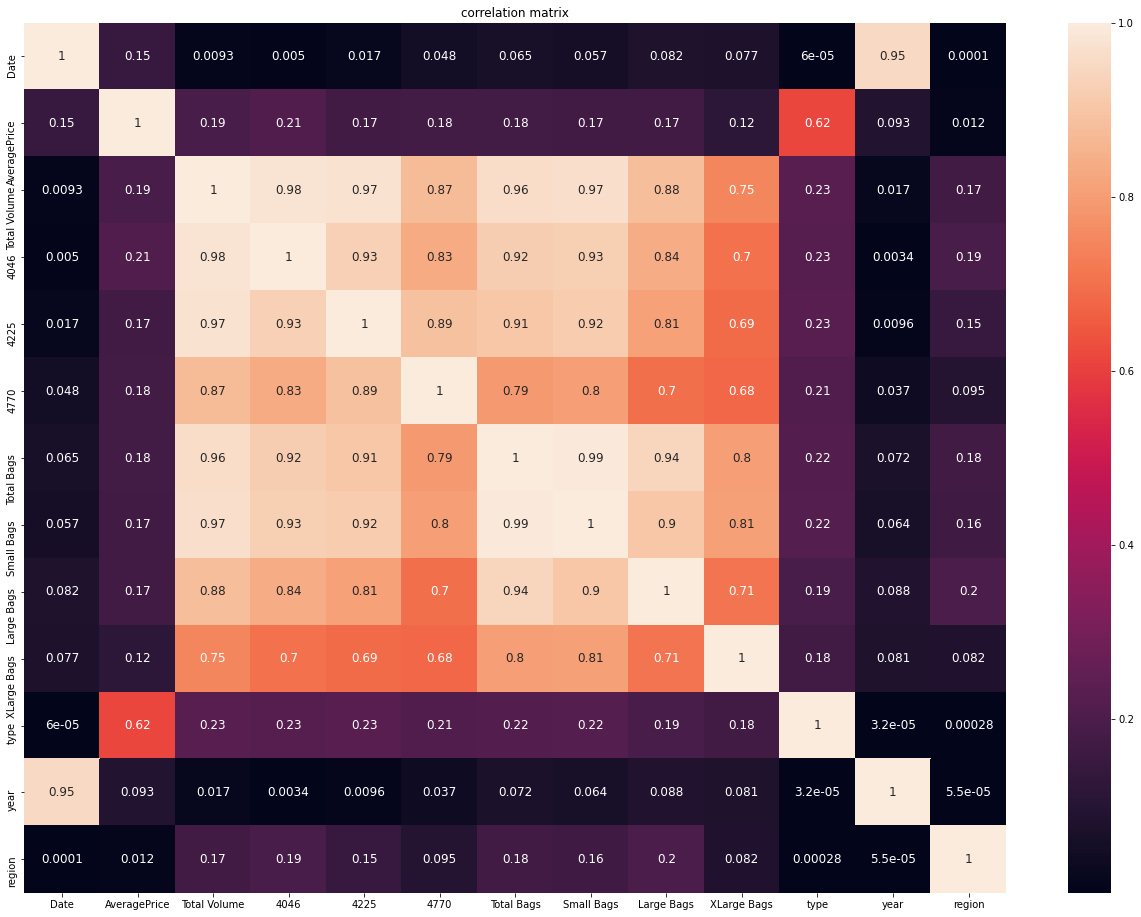

In [57]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()    

# Correlation of region with respect to all the other features:

In [37]:
corr=df.corr()
corr['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
type            0.000280
year           -0.000055
Date           -0.000101
AveragePrice   -0.011716
Name: region, dtype: float64

# Checking Outliers:

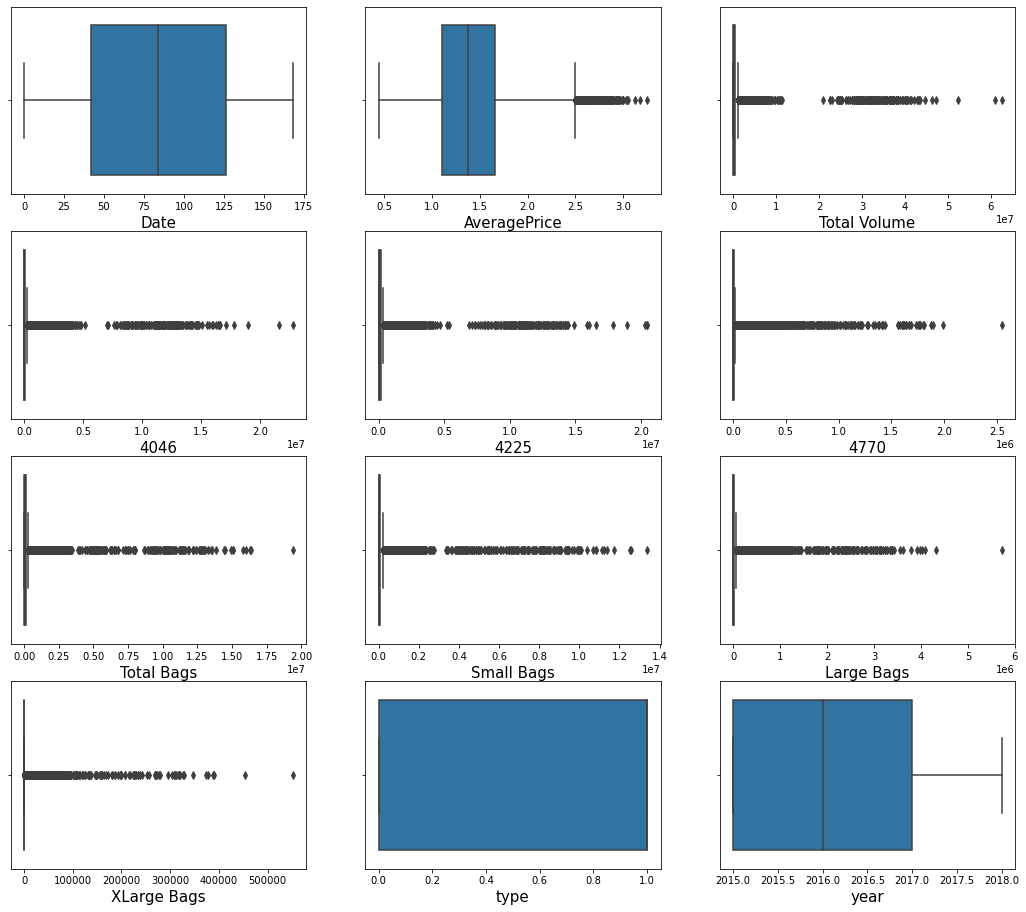

In [40]:
x=df.drop(columns=['region'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=15:
        ax=plt.subplot(5,3,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

# skewness:

In [38]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type            -0.000329
year             0.215339
region           0.000030
dtype: float64

# FEATURE SELECTION METHOD:

In [7]:
from sklearn.feature_selection import SelectKBest,f_classif

x=df.drop('region',axis=1)
y=df.region

best_features=SelectKBest(score_func=f_classif,k=9)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','Score']

feature_scores.nlargest(9,'Score')

,Feature_name,Score
2,Total Volume,319.035278
4,4225,308.834412
7,Small Bags,298.998145
3,4046,295.483768
6,Total Bags,295.176645
8,Large Bags,254.735012
5,4770,208.050643
9,XLarge Bags,123.297554
1,AveragePrice,69.383811


# New dataset with only best feature columns:

In [8]:
df_new=df[['Total Volume','4225','Small Bags','4046','Total Bags','Large Bags','4770','XLarge Bags','AveragePrice','region']]
df_new

,Total Volume,4225,Small Bags,4046,Total Bags,Large Bags,4770,XLarge Bags,AveragePrice,region
0,64236.62,54454.85,8603.62,1036.74,8696.87,93.25,48.16,0.0,1.33,0
1,54876.98,44638.81,9408.07,674.28,9505.56,97.49,58.33,0.0,1.35,0
2,118220.22,109149.67,8042.21,794.70,8145.35,103.14,130.50,0.0,0.93,0
3,78992.15,71976.41,5677.40,1132.00,5811.16,133.76,72.58,0.0,1.08,0
4,51039.60,43838.39,5986.26,941.48,6183.95,197.69,75.78,0.0,1.28,0
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,1529.20,13066.82,2046.96,13498.67,431.85,0.00,0.0,1.63,53
18245,13888.04,3431.50,8940.04,1191.70,9264.84,324.80,0.00,0.0,1.71,53
18246,13766.76,2452.79,9351.80,1191.92,9394.11,42.31,727.94,0.0,1.87,53
18247,16205.22,2981.04,10919.54,1527.63,10969.54,50.00,727.01,0.0,1.93,53


# ZSCORE TECHNIQUE:
    TO REMOVE OUTLIERS:

In [9]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df_new)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df_new[filtering_entry]


In [10]:
df

,Total Volume,4225,Small Bags,4046,Total Bags,Large Bags,4770,XLarge Bags,AveragePrice,region
0,64236.62,54454.85,8603.62,1036.74,8696.87,93.25,48.16,0.0,1.33,0
1,54876.98,44638.81,9408.07,674.28,9505.56,97.49,58.33,0.0,1.35,0
2,118220.22,109149.67,8042.21,794.70,8145.35,103.14,130.50,0.0,0.93,0
3,78992.15,71976.41,5677.40,1132.00,5811.16,133.76,72.58,0.0,1.08,0
4,51039.60,43838.39,5986.26,941.48,6183.95,197.69,75.78,0.0,1.28,0
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,1529.20,13066.82,2046.96,13498.67,431.85,0.00,0.0,1.63,53
18245,13888.04,3431.50,8940.04,1191.70,9264.84,324.80,0.00,0.0,1.71,53
18246,13766.76,2452.79,9351.80,1191.92,9394.11,42.31,727.94,0.0,1.87,53
18247,16205.22,2981.04,10919.54,1527.63,10969.54,50.00,727.01,0.0,1.93,53


# checking percentage loss:

In [45]:
loss_percent=(18249-17651)/18249*100
loss_percent

3.276891884486821

# PowerTransformation to remove skewness:

In [11]:
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson')

In [12]:
features=['Total Volume','4225','Small Bags','4046','Total Bags','Large Bags','4770','XLarge Bags','AveragePrice']
df[features]=scaler.fit_transform(df[features].values)

In [13]:
df[features]

,Total Volume,4225,Small Bags,4046,Total Bags,Large Bags,4770,XLarge Bags,AveragePrice
0,-0.075324,0.351430,-0.347421,-0.657421,-0.537507,-0.781153,-0.222566,-0.677919,-0.117824
1,-0.147497,0.269513,-0.311322,-0.777179,-0.498128,-0.771198,-0.175223,-0.677919,-0.064330
2,0.205556,0.649333,-0.374453,-0.731776,-0.566369,-0.758523,0.023923,-0.677919,-1.298865
3,0.019655,0.468799,-0.510991,-0.632592,-0.713068,-0.699123,-0.121164,-0.677919,-0.829026
4,-0.180674,0.262126,-0.490534,-0.684504,-0.686312,-0.607027,-0.110491,-0.677919,-0.253635
...,...,...,...,...,...,...,...,...,...
18244,-0.678214,-0.926028,-0.175753,-0.462066,-0.340422,-0.412401,-1.228986,-0.677919,0.639410
18245,-0.771326,-0.670600,-0.331971,-0.618019,-0.509513,-0.484991,-1.228986,-0.677919,0.826487
18246,-0.775274,-0.778893,-0.313756,-0.617966,-0.503366,-0.950743,0.445710,-0.677919,1.184324
18247,-0.701797,-0.716371,-0.250408,-0.547011,-0.434176,-0.916068,0.445399,-0.677919,1.313296


# Desired model:

In [14]:
x=df.drop(columns='region')
y=df.region

# scaling:

In [15]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# KNeighborsClassifier MODEL:

In [16]:
knn=KNeighborsClassifier()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    pred_test=knn.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Best accuracy is: ',maxacc,'Best state is: ',maxrs)

Best accuracy is:  0.8547153780798641 Best state is:  80


# TRAIN TEST SPLIT:

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=80)


In [19]:
from sklearn.metrics import classification_report
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8547153780798641
confusion_matrix: 
 [[72  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0 58 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  1  0 ...  0 47  0]
 [ 0  0  1 ...  0  0 52]]
classification report:                precision    recall  f1-score   support

           0       0.82      0.97      0.89        74
           1       0.68      0.76      0.72        67
           2       0.91      0.97      0.94        60
           3       0.84      0.85      0.85        55
           4       0.87      0.87      0.87        69
           5       0.88      0.74      0.80        76
           6       0.93      0.96      0.95        56
           7       0.81      0.92      0.87        66
           8       0.97      0.94      0.96        70
           9       0.78      0.81      0.80        63
          10       0.71      0.73      0.72        71
          11       0.93      0.95      0.94        83
          12       0.88      0.94      0.91        71
          13 

# DecisionTreeClassifier MODEL

In [21]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
pred_test=clf1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.7796658170489946
confusion_matrix: 
 [[55  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  1]
 [ 0  0 52 ...  0  0  2]
 ...
 [ 0  0  0 ... 33  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  0  2 ...  0  0 42]]
classification report:                precision    recall  f1-score   support

           0       0.76      0.74      0.75        74
           1       0.72      0.72      0.72        67
           2       0.85      0.87      0.86        60
           3       0.76      0.80      0.78        55
           4       0.81      0.84      0.82        69
           5       0.68      0.72      0.70        76
           6       0.93      0.96      0.95        56
           7       0.89      0.86      0.88        66
           8       0.97      0.91      0.94        70
           9       0.79      0.73      0.76        63
          10       0.60      0.69      0.64        71
          11       0.91      0.84      0.88        83
          12       0.86      0.86      0.86        71
          13 

# LogisticRegression model:

In [25]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.3446615689606344
confusion_matrix: 
 [[25  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 25  1  0]
 [ 0  1  0 ...  1 27  0]
 [ 0  0  0 ...  0  0  6]]
classification report:                precision    recall  f1-score   support

           0       0.54      0.34      0.42        74
           1       0.15      0.31      0.20        67
           2       0.44      0.45      0.44        60
           3       0.18      0.27      0.22        55
           4       0.31      0.38      0.34        69
           5       0.23      0.14      0.18        76
           6       0.64      0.75      0.69        56
           7       0.42      0.62      0.50        66
           8       0.49      0.59      0.54        70
           9       0.39      0.57      0.46        63
          10       0.22      0.20      0.21        71
          11       0.52      0.37      0.43        83
          12       0.31      0.25      0.28        71
          13 

# RandomForestClassifier model

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
pred_test=clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8943642027754177
confusion_matrix: 
 [[71  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  0  1 ...  0  0 60]]
classification report:                precision    recall  f1-score   support

           0       0.88      0.96      0.92        74
           1       0.81      0.85      0.83        67
           2       0.92      0.98      0.95        60
           3       0.89      0.89      0.89        55
           4       0.93      0.91      0.92        69
           5       0.81      0.76      0.78        76
           6       0.93      1.00      0.97        56
           7       0.89      0.89      0.89        66
           8       0.97      0.99      0.98        70
           9       0.87      0.86      0.86        63
          10       0.82      0.89      0.85        71
          11       0.95      0.98      0.96        83
          12       0.94      0.93      0.94        71
          13 

out of all the 4 models randomforest model is performing well,so we consider this MODEL:

# CROSS VALIDATION SCORE:

In [27]:
pred_test=clf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_test)
for i in range(2,10):
    lsscore=cross_val_score(clf,x,y,cv=i)
    lsc=lsscore.mean()
    print('at cv:-',i)
    print('cv score-',lsc*100)
    print('acc_score-',lss*100)

at cv:- 2
cv score- 8.52058077185036
acc_score- 89.43642027754177
at cv:- 3
cv score- 52.019046033193774
acc_score- 89.43642027754177
at cv:- 4
cv score- 60.09240116001124
acc_score- 89.43642027754177
at cv:- 5
cv score- 65.7359157217779
acc_score- 89.43642027754177
at cv:- 6
cv score- 66.590842040144
acc_score- 89.43642027754177
at cv:- 7
cv score- 73.33755690895919
acc_score- 89.43642027754177
at cv:- 8
cv score- 74.03429950281823
acc_score- 89.43642027754177
at cv:- 9
cv score- 73.81951508949373
acc_score- 89.43642027754177


# CHECKING CV FOR ALL THE MODELS:

In [28]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(knn,x_scaled,y,cv=8)
print('cross validation score of knn model is:',csv.mean())

cross validation score of knn model is: 0.6677123980362492


In [30]:
csv=cross_val_score(clf1,x_scaled,y,cv=8)
print('cross validation score of decision tree model is:',csv.mean())

cross validation score of decision tree model is: 0.6083411709055626


In [31]:
csv=cross_val_score(lr,x_scaled,y,cv=8)
print('cross validation score of logistic regression model is:',csv.mean())

cross validation score of Ranom forest classifier model is: 0.2644655583630918


In [32]:
csv=cross_val_score(clf,x_scaled,y,cv=8)
print('cross validation score of Random forest classifier model is:',csv.mean())

cross validation score of Random forest classifier model is: 0.7429497024016143


# HYPER PARAMETER TUNING:

In [33]:
from sklearn.model_selection import GridSearchCV
params={    'criterion':['gini','entropy'],
            'max_depth':[10,15],
            'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }
gri=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')
gri.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11]},
             scoring='accuracy')

In [34]:
print(gri.best_params_)
gri_pred=gri.best_estimator_.predict(x_test)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [35]:
accuracy_score(y_test,gri_pred)

0.8660436137071651

# SAVING THE MODEL:

In [39]:
import pickle
filename='region.pkl'
pickle.dump(gri.best_estimator_,open(filename,'wb'))


# Conclusion:

In [40]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gri.best_estimator_.predict(x_test))
df_conclusion=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_conclusion

,Original,Predicted
0,10,10
1,18,18
2,11,11
3,15,15
4,3,3
...,...,...
3526,41,41
3527,0,0
3528,22,22
3529,36,40


# MODEL2: REGRESSION MODEL

# Load the dataset:

In [39]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.columns#checking the column names

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
# Removing the unwanted and unrelated columns:

df=df.drop(columns='Unnamed: 0',axis=1)
df.shape # checking the dataset dimension

(18249, 13)

In [6]:
df.isnull().sum() #checking the null value count of all the coulumns

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Describing the data:

In [7]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
df.dtypes#CHECKING THE DATATYPE OF EACH COLUMN

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df['type']=df['type'].replace({'conventional':1,'organic':0})#Replacing the type with values

# Encoding:

# converting all the object TYPE feautures to values.

In [8]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=ord_enc.fit_transform(df[i].values.reshape(-1,1))


# Checking the correlation:

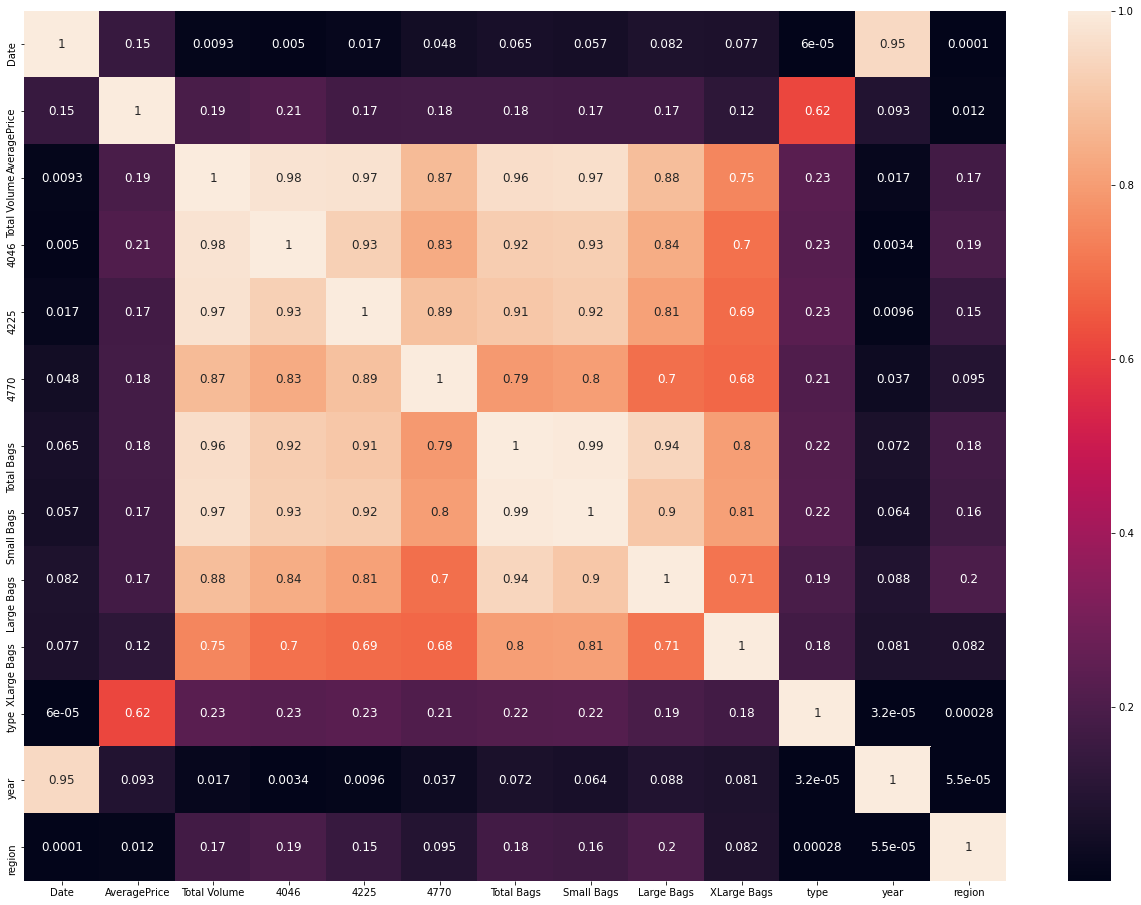

In [11]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()  

# Correlation of Price with respect to all the other features:

In [12]:
corr=df.corr()
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
Date            0.145514
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
type           -0.615845
Name: AveragePrice, dtype: float64

# SKEWNESS:

In [13]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type            -0.000329
year             0.215339
region           0.000030
dtype: float64

# Checking Outliers:

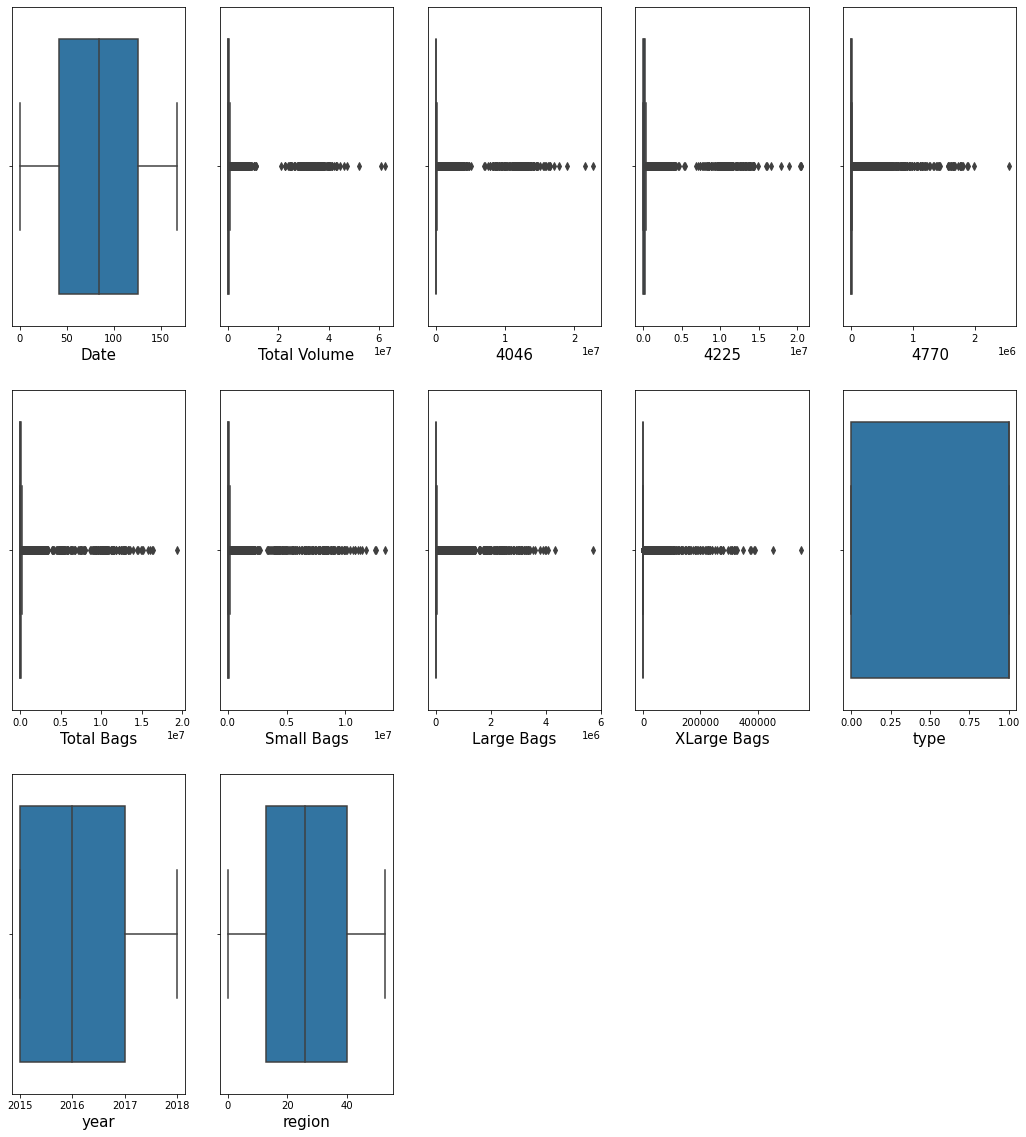

In [14]:
x=df.drop(columns=['AveragePrice'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=15:
        ax=plt.subplot(3,5,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()  

# Feature Selection:

In [9]:
from sklearn.feature_selection import SelectKBest,f_classif

x=df.drop('AveragePrice',axis=1)
y=df.region

best_features=SelectKBest(score_func=f_classif,k=10)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','Score']

feature_scores.nlargest(10,'Score')

,Feature_name,Score
11,region,inf
1,Total Volume,319.035278
3,4225,308.834412
6,Small Bags,298.998145
2,4046,295.483768
5,Total Bags,295.176645
7,Large Bags,254.735012
4,4770,208.050643
8,XLarge Bags,123.297554
9,type,0.000496


# Creating a new dataframe with those best features and label:

In [10]:
df_new=df[['region','Total Volume','4225','Small Bags','4046','Total Bags','Large Bags','4770','XLarge Bags','type','AveragePrice']]
df_new

,region,Total Volume,4225,Small Bags,4046,Total Bags,Large Bags,4770,XLarge Bags,type,AveragePrice
0,0.0,64236.62,54454.85,8603.62,1036.74,8696.87,93.25,48.16,0.0,1,1.33
1,0.0,54876.98,44638.81,9408.07,674.28,9505.56,97.49,58.33,0.0,1,1.35
2,0.0,118220.22,109149.67,8042.21,794.70,8145.35,103.14,130.50,0.0,1,0.93
3,0.0,78992.15,71976.41,5677.40,1132.00,5811.16,133.76,72.58,0.0,1,1.08
4,0.0,51039.60,43838.39,5986.26,941.48,6183.95,197.69,75.78,0.0,1,1.28
...,...,...,...,...,...,...,...,...,...,...,...
18244,53.0,17074.83,1529.20,13066.82,2046.96,13498.67,431.85,0.00,0.0,0,1.63
18245,53.0,13888.04,3431.50,8940.04,1191.70,9264.84,324.80,0.00,0.0,0,1.71
18246,53.0,13766.76,2452.79,9351.80,1191.92,9394.11,42.31,727.94,0.0,0,1.87
18247,53.0,16205.22,2981.04,10919.54,1527.63,10969.54,50.00,727.01,0.0,0,1.93


# Z-Score Technique:

In [11]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df_new)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df_new[filtering_entry]
df

,region,Total Volume,4225,Small Bags,4046,Total Bags,Large Bags,4770,XLarge Bags,type,AveragePrice
0,0.0,64236.62,54454.85,8603.62,1036.74,8696.87,93.25,48.16,0.0,1,1.33
1,0.0,54876.98,44638.81,9408.07,674.28,9505.56,97.49,58.33,0.0,1,1.35
2,0.0,118220.22,109149.67,8042.21,794.70,8145.35,103.14,130.50,0.0,1,0.93
3,0.0,78992.15,71976.41,5677.40,1132.00,5811.16,133.76,72.58,0.0,1,1.08
4,0.0,51039.60,43838.39,5986.26,941.48,6183.95,197.69,75.78,0.0,1,1.28
...,...,...,...,...,...,...,...,...,...,...,...
18244,53.0,17074.83,1529.20,13066.82,2046.96,13498.67,431.85,0.00,0.0,0,1.63
18245,53.0,13888.04,3431.50,8940.04,1191.70,9264.84,324.80,0.00,0.0,0,1.71
18246,53.0,13766.76,2452.79,9351.80,1191.92,9394.11,42.31,727.94,0.0,0,1.87
18247,53.0,16205.22,2981.04,10919.54,1527.63,10969.54,50.00,727.01,0.0,0,1.93


# checking the LOSS PERCENTILE:

In [12]:
loss_percent=(18249-17651)/18249*100
loss_percent

3.276891884486821

# Power transformation:

To remove skewness

In [13]:
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson')
features=['region','Total Volume','4225','Small Bags','4046','Total Bags','Large Bags','4770','XLarge Bags']
df[features]=scaler.fit_transform(df[features].values)
df[features]

,region,Total Volume,4225,Small Bags,4046,Total Bags,Large Bags,4770,XLarge Bags
0,-2.010590,-0.075324,0.351430,-0.347421,-0.657421,-0.537507,-0.781153,-0.222566,-0.677919
1,-2.010590,-0.147497,0.269513,-0.311322,-0.777179,-0.498128,-0.771198,-0.175223,-0.677919
2,-2.010590,0.205556,0.649333,-0.374453,-0.731776,-0.566369,-0.758523,0.023923,-0.677919
3,-2.010590,0.019655,0.468799,-0.510991,-0.632592,-0.713068,-0.699123,-0.121164,-0.677919
4,-2.010590,-0.180674,0.262126,-0.490534,-0.684504,-0.686312,-0.607027,-0.110491,-0.677919
...,...,...,...,...,...,...,...,...,...
18244,1.578282,-0.678214,-0.926028,-0.175753,-0.462066,-0.340422,-0.412401,-1.228986,-0.677919
18245,1.578282,-0.771326,-0.670600,-0.331971,-0.618019,-0.509513,-0.484991,-1.228986,-0.677919
18246,1.578282,-0.775274,-0.778893,-0.313756,-0.617966,-0.503366,-0.950743,0.445710,-0.677919
18247,1.578282,-0.701797,-0.716371,-0.250408,-0.547011,-0.434176,-0.916068,0.445399,-0.677919


# scaling and splitting the feature and label from the dataset:

In [14]:
y=df['AveragePrice']
x=df.drop(columns=['AveragePrice'])
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# Linear Regression model:

In [15]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(f'At random state-{i},the training accuracy is -{r2_score(y_train,pred_train)}')
        print(f'At random state-{i},the testing accuracy is -{r2_score(y_test,pred_test)}')
        print('\n')


At random state-86,the training accuracy is -0.4975008239747376
At random state-86,the testing accuracy is -0.4978473576097905




# Splitting the data using train test split:

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=86)


In [18]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
r2_score(y_test,pred_test)

0.4978473576097905

In [19]:
pred_train=lr.predict(x_train)

# graph of linear regression model:

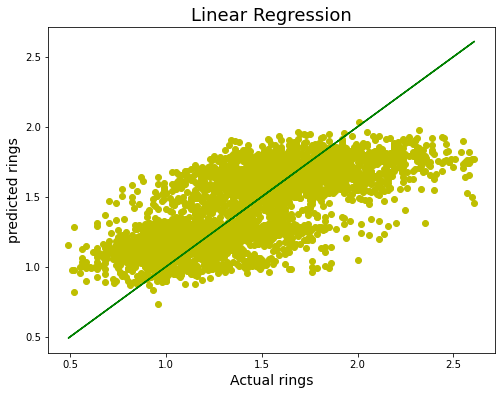

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test,color='y')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual rings',fontsize=14)
plt.ylabel('predicted rings',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Hyperparameter tuning:

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


# LASSO MODEL:

In [22]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.4977911458555576

# CV SCORE:

In [25]:
csv=cross_val_score(ls,x,y,cv=9)
cv_mean=csv.mean()
cv_mean

0.0410518583556884

# Ensemble approach:
> # RandomForestRegressor:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [28]:

rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2 Score: ',rfs*100)

rfcsv=cross_val_score(rf,x,y,cv=3)
rf_cv_mean=rfcsv.mean()
print('Cross validation Score: ',rf_cv_mean*100)

R2 Score:  80.55594823099301
Cross validation Score:  14.068796820577981


# SVR model:

In [33]:
from sklearn.svm import SVR
parameters={'kernel':['linear','poly', 'rbf'],'gamma':['scale', 'auto']}
svr=SVR()
clf1=GridSearchCV(svr,parameters)
clf1.fit(x_train,y_train)

print(clf1.best_params_)

{'gamma': 'auto', 'kernel': 'rbf'}


In [35]:
svr=SVR(kernel='rbf',gamma='auto')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_rf=svr.predict(x_test)

svrs=r2_score(y_test,pred_rf)
print('R2 Score: ',svrs*100)

svrcsv=cross_val_score(svr,x,y,cv=3)
svr_cv_mean=svrcsv.mean()
print('Cross validation Score: ',svr_cv_mean*100)

R2 Score:  65.8535652215266
Cross validation Score:  8.406377690159816


# Of all the models Randomforest regressor is performing well.

# Saving the model:

In [36]:
import pickle
filename='AveragePRICEprediction.pkl'
pickle.dump(rf,open(filename,'wb'))

#  Loading the Pickle File and checking the Score:

In [37]:
loaded_model=pickle.load(open('AveragePRICEprediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8055594823099301


# Conclusion:

In [41]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_conclusion=pd.DataFrame({'Original_sales':a,'Predicted_sales':predicted},index=range(len(a)))
df_conclusion

,Original_sales,Predicted_sales
0,1.32,1.65190
1,1.40,1.57905
2,1.00,1.02820
3,0.77,1.01980
4,1.74,1.73330
...,...,...
3526,1.29,1.38780
3527,1.11,1.10060
3528,1.91,1.57320
3529,2.29,1.81430
